In [31]:
import pandas as pd
pd.set_option('display.max_rows', 700)
import numpy as np
from IPython.display import Image
import math
import statistics

## 1. Data Summary

Data in the format:
1. angle: right elbow = (6,8,10)
2. angle: left elbow = (5,7,9)
3. angle: right shoulder to hand = (5, 6, 8)
4. angle: left shoulder to hand = (6, 5, 7)
5. distance: right shoulder to right hand = (6,10)
6. distance: left shoulder to left hand =(5,9)
7. distance: right hip to right  (10, 12)
8. distance: left hip to left hip (9, 11)
9. distance: right shoulder to right hip = (6, 12)
10. distance: left shoulder to left hip = (5, 11)
11. point (x): right hand = 10
12. point (y): right hand = 10
13. point (x): left hand = 9
14. point (y): left hand = 9
15. point (x): right shoulder = 6
16. point (y): right shoulder = 6
17. point (x): left shoulder = 5
18. point (y): left shoulder = 5
19. point (x): right hip = 12
20. point (y): right hip = 12
21. point (x): left hip = 11
22. point (y): left hip = 11

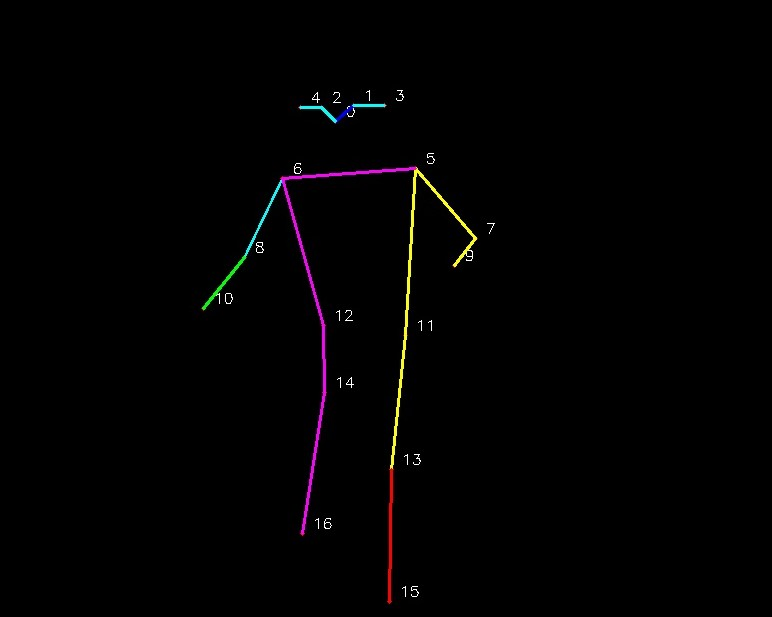

In [32]:
Image("notebook_files/point_map.jpeg")

## 2. Import Data

In [33]:
input_file = 'output/train_front.csv'

### Numpy Import

In [34]:
# Import data from output files
data = np.loadtxt(input_file,delimiter=',')
data

array([[  0.        ,  34.        , 105.        , ..., 725.81768799,
        839.2956543 , 722.67974854],
       [  0.        ,  34.        , 105.        , ..., 725.04882812,
        839.02478027, 722.0111084 ],
       [  0.        ,  34.        , 105.        , ..., 725.42199707,
        838.38415527, 722.43359375],
       ...,
       [ 54.        ,  74.        ,  50.        , ..., 759.87890625,
         17.17560577, 784.52587891],
       [172.        , 175.        ,  90.        , ..., 777.5612793 ,
        878.94030762, 785.89477539],
       [ 66.        ,  43.        ,  51.        , ..., 760.17755127,
         24.74289703, 786.14978027]])

### Pandas Import

In [35]:
col_names = [
    'angle_right_elbow',
    'angle_left_elbow',
    'angle_right_shoulder',
    'angle_left_shoulder',
    'dist_right_shoulder_hand',
    'dist_left_shoulder_hand',
    'dist_right_hip_hand',
    'dist_left_hip_hand',
    'dist_right_shoulder_hip',
    'dist_left_shoulder_hip',
    'x_right_hand',
    'y_right_hand',
    'x_left_hand',
    'y_left_hand',
    'x_right_shoulder',
    'y_right_shoulder',
    'x_left_shoulder',
    'y_left_shoulder',
    'x_right_hip',
    'y_right_hip',
    'x_left_hip',
    'y_left_hip'
]

In [36]:
df_og = pd.read_csv(input_file, names=col_names)
df_og

,angle_right_elbow,angle_left_elbow,angle_right_shoulder,angle_left_shoulder,dist_right_shoulder_hand,dist_left_shoulder_hand,dist_right_hip_hand,dist_left_hip_hand,dist_right_shoulder_hip,dist_left_shoulder_hip,...,x_left_hand,y_left_hand,x_right_shoulder,y_right_shoulder,x_left_shoulder,y_left_shoulder,x_right_hip,y_right_hip,x_left_hip,y_left_hip
0,0,34,105,82,55.693395,93.795490,237.608814,274.835270,290.046152,303.206259,...,745.427795,464.371307,668.926086,441.795532,827.895874,419.687866,727.732422,725.817688,839.295654,722.679749
1,0,34,105,82,54.286032,93.656978,236.279382,272.835409,287.250825,300.193848,...,744.185425,466.189575,669.037170,443.946075,826.797607,422.066376,728.149597,725.048828,839.024780,722.011108
2,0,34,105,82,53.677318,94.398902,236.624602,270.648913,286.206012,299.708179,...,743.446045,468.982239,670.058960,445.194336,825.881042,422.986328,728.251221,725.421997,838.384155,722.433594
3,0,34,106,82,57.143837,94.692949,232.443452,269.059940,284.918144,299.580742,...,743.419678,471.345123,670.230774,447.117859,825.307190,423.793152,728.699768,725.972168,838.386230,723.088257
4,0,34,106,81,57.519918,94.719278,229.092748,266.661551,281.837218,297.996973,...,743.530640,473.024048,669.533142,449.954163,824.800110,424.372070,729.260376,725.389954,838.938721,722.033447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,39,52,53,127,306.578869,330.131338,199.603204,177.769912,503.556714,470.598869,...,134.235870,640.480164,10.766834,252.589752,84.965088,314.046265,-8.548615,755.775879,25.123547,780.824890
706,172,175,90,111,581.639648,529.217414,65.449492,291.256627,537.152594,523.172640,...,1170.316650,787.333740,654.139465,240.135773,1016.726196,280.894165,667.602295,777.119629,879.065002,785.630737
707,54,74,50,132,313.491813,362.559773,213.094602,186.864646,524.108477,493.207255,...,146.045258,649.207703,10.372658,236.229614,71.732849,294.345398,-11.561661,759.878906,17.175606,784.525879
708,172,175,90,111,581.798135,528.751496,64.780317,294.378180,537.440227,523.305820,...,1173.318237,786.278687,655.015015,240.282074,1017.056824,281.144531,668.169983,777.561279,878.940308,785.894775


In [37]:
df_og['x_right_hand'].values()

TypeError: 'numpy.ndarray' object is not callable

In [38]:
# Add in time
df_og['time'] = df_og.index / 30

In [39]:
df_og.dtypes

angle_right_elbow             int64
angle_left_elbow              int64
angle_right_shoulder          int64
angle_left_shoulder           int64
dist_right_shoulder_hand    float64
dist_left_shoulder_hand     float64
dist_right_hip_hand         float64
dist_left_hip_hand          float64
dist_right_shoulder_hip     float64
dist_left_shoulder_hip      float64
x_right_hand                float64
y_right_hand                float64
x_left_hand                 float64
y_left_hand                 float64
x_right_shoulder            float64
y_right_shoulder            float64
x_left_shoulder             float64
y_left_shoulder             float64
x_right_hip                 float64
y_right_hip                 float64
x_left_hip                  float64
y_left_hip                  float64
time                        float64
dtype: object

## 3. Setup calculations

In [40]:
df = df_og

### a. Calculate x-Distance from hand to shoulder

In [41]:
# x-distance from hand to shoulder
df['dist_right_hand_shoulder'] = abs(df['x_right_hand'] - df['x_right_shoulder'])
df['dist_left_hand_shoulder'] = abs(df['x_left_hand'] - df['x_left_shoulder'])
df['dist_right_hand_hip'] = abs(df['x_right_hand'] - df['x_right_hip'])
df['dist_left_hand_hip'] = abs(df['x_left_hand'] - df['x_left_hip'])

In [42]:
df

,angle_right_elbow,angle_left_elbow,angle_right_shoulder,angle_left_shoulder,dist_right_shoulder_hand,dist_left_shoulder_hand,dist_right_hip_hand,dist_left_hip_hand,dist_right_shoulder_hip,dist_left_shoulder_hip,...,y_left_shoulder,x_right_hip,y_right_hip,x_left_hip,y_left_hip,time,dist_right_hand_shoulder,dist_left_hand_shoulder,dist_right_hand_hip,dist_left_hand_hip
0,0,34,105,82,55.693395,93.795490,237.608814,274.835270,290.046152,303.206259,...,419.687866,727.732422,725.817688,839.295654,722.679749,0.000000,5.865173,82.468079,64.671509,93.867859
1,0,34,105,82,54.286032,93.656978,236.279382,272.835409,287.250825,300.193848,...,422.066376,728.149597,725.048828,839.024780,722.011108,0.033333,5.952942,82.612183,65.065369,94.839355
2,0,34,105,82,53.677318,94.398902,236.624602,270.648913,286.206012,299.708179,...,422.986328,728.251221,725.421997,838.384155,722.433594,0.066667,8.063293,82.434998,66.255554,94.938110
3,0,34,106,82,57.143837,94.692949,232.443452,269.059940,284.918144,299.580742,...,423.793152,728.699768,725.972168,838.386230,723.088257,0.100000,9.027222,81.887512,67.496216,94.966553
4,0,34,106,81,57.519918,94.719278,229.092748,266.661551,281.837218,297.996973,...,424.372070,729.260376,725.389954,838.938721,722.033447,0.133333,8.822449,81.269470,68.549683,95.408081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,39,52,53,127,306.578869,330.131338,199.603204,177.769912,503.556714,470.598869,...,314.046265,-8.548615,755.775879,25.123547,780.824890,23.500000,13.417328,49.270782,32.732777,109.112324
706,172,175,90,111,581.639648,529.217414,65.449492,291.256627,537.152594,523.172640,...,280.894165,667.602295,777.119629,879.065002,785.630737,23.533333,35.368164,153.590454,48.830994,291.251648
707,54,74,50,132,313.491813,362.559773,213.094602,186.864646,524.108477,493.207255,...,294.345398,-11.561661,759.878906,17.175606,784.525879,23.566667,11.940193,74.312408,33.874512,128.869652
708,172,175,90,111,581.798135,528.751496,64.780317,294.378180,537.440227,523.305820,...,281.144531,668.169983,777.561279,878.940308,785.894775,23.600000,34.872070,156.261414,48.027039,294.377930


### b. Distance from hand to hip and shoulder

In [43]:
# Helper function to get the distance
def getDistance(x1, y1, x2, y2):
    '''
    Gets the distance between two points p1 and p2
    # NOTE: KEYPOINT MAP HERE: https://github.com/JRKagumba/2D-video-pose-estimation-yolov7
    '''
    distance = math.sqrt(((y2 - y1) ** 2) + ((x2 - x1) ** 2))
    return distance

In [44]:
# Helper function to determine if hand is closer to hip or shoulder
def hand_closer_hip_shoulder(x_hand, y_hand, x_shoulder, y_shoulder, x_hip, y_hip):
    dist_hand_shoulder = getDistance(x_hand, y_hand, x_shoulder, y_shoulder)
    dist_hand_hip = getDistance(x_hand, y_hand, x_hip, y_hip)
    if (dist_hand_shoulder < dist_hand_hip):
        return "shoulder"
    else:
        return "hip"

In [45]:
# Creates a new column right_hand_closer_hip_shoulder
# Applies hand_closer_hip_shoulder to each row
# If closer to shoulder, row specifies 'shoulder'
# If closer to hip, row specifies 'hip'
df['right_hand_closer_hip_shoulder'] = df.apply(
    lambda row: (
        hand_closer_hip_shoulder(
            row['x_right_hand'], 
            row['y_right_hand'], 
            row['x_right_shoulder'],
            row['y_right_shoulder'],
            row['x_right_hip'],
            row['y_right_hip']
        )
    ),
    axis=1
)

In [46]:
# Now lets apply the same function to determine if 
# the left hand is closer to the hip or shoulder
df['left_hand_closer_hip_shoulder'] = df.apply(
    lambda row: (
        hand_closer_hip_shoulder(
            row['x_left_hand'], 
            row['y_left_hand'], 
            row['x_left_shoulder'],
            row['y_left_shoulder'],
            row['x_left_hip'],
            row['y_left_hip']
        )
    ),
    axis=1
)

In [47]:
df

,angle_right_elbow,angle_left_elbow,angle_right_shoulder,angle_left_shoulder,dist_right_shoulder_hand,dist_left_shoulder_hand,dist_right_hip_hand,dist_left_hip_hand,dist_right_shoulder_hip,dist_left_shoulder_hip,...,y_right_hip,x_left_hip,y_left_hip,time,dist_right_hand_shoulder,dist_left_hand_shoulder,dist_right_hand_hip,dist_left_hand_hip,right_hand_closer_hip_shoulder,left_hand_closer_hip_shoulder
0,0,34,105,82,55.693395,93.795490,237.608814,274.835270,290.046152,303.206259,...,725.817688,839.295654,722.679749,0.000000,5.865173,82.468079,64.671509,93.867859,shoulder,shoulder
1,0,34,105,82,54.286032,93.656978,236.279382,272.835409,287.250825,300.193848,...,725.048828,839.024780,722.011108,0.033333,5.952942,82.612183,65.065369,94.839355,shoulder,shoulder
2,0,34,105,82,53.677318,94.398902,236.624602,270.648913,286.206012,299.708179,...,725.421997,838.384155,722.433594,0.066667,8.063293,82.434998,66.255554,94.938110,shoulder,shoulder
3,0,34,106,82,57.143837,94.692949,232.443452,269.059940,284.918144,299.580742,...,725.972168,838.386230,723.088257,0.100000,9.027222,81.887512,67.496216,94.966553,shoulder,shoulder
4,0,34,106,81,57.519918,94.719278,229.092748,266.661551,281.837218,297.996973,...,725.389954,838.938721,722.033447,0.133333,8.822449,81.269470,68.549683,95.408081,shoulder,shoulder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,39,52,53,127,306.578869,330.131338,199.603204,177.769912,503.556714,470.598869,...,755.775879,25.123547,780.824890,23.500000,13.417328,49.270782,32.732777,109.112324,hip,hip
706,172,175,90,111,581.639648,529.217414,65.449492,291.256627,537.152594,523.172640,...,777.119629,879.065002,785.630737,23.533333,35.368164,153.590454,48.830994,291.251648,hip,hip
707,54,74,50,132,313.491813,362.559773,213.094602,186.864646,524.108477,493.207255,...,759.878906,17.175606,784.525879,23.566667,11.940193,74.312408,33.874512,128.869652,hip,hip
708,172,175,90,111,581.798135,528.751496,64.780317,294.378180,537.440227,523.305820,...,777.561279,878.940308,785.894775,23.600000,34.872070,156.261414,48.027039,294.377930,hip,hip


In [48]:
df['right_hand_closer_hip_shoulder'].value_counts()

shoulder    553
hip         157
Name: right_hand_closer_hip_shoulder, dtype: int64

### c. Calculate average of all shoulder to hip values

This is used to determine an approximate distance in pixels

In [49]:
avg_hip_shoulder = statistics.mean([df['dist_right_shoulder_hip'].mean(), df['dist_left_shoulder_hip'].mean()])
avg_hip_shoulder

331.0608123092708

### d. Distance from hand to shoulder-waist line

In [50]:
# Helper function to get the distance
def getDistanceFromLine(x_hand, y_hand, x_shoulder, y_shoulder, x_hip, y_hip):
    '''
    Determines the HORIZONTAL from
    line: hip to shoulder
    point: hand
    NOTE: This is not the perpendicular distance, but the HORIZONTAL DISTANCE
    '''
    # Create line from two points
    m = (y_hip - y_shoulder) / (x_hip - x_shoulder)
    b = y_shoulder - m*x_shoulder
    # Determine 
    x_line = (y_hand - b) / m
    
    dist_from_line = abs(x_hand - x_line)
    # dist_from_line = x_hand - x_line

    return dist_from_line

In [51]:
# Now lets add a column to determine right hand distance to line
df['dist_right_hand_line'] = df.apply(
    lambda row: (
        getDistanceFromLine(
            row['x_right_hand'], 
            row['y_right_hand'], 
            row['x_right_shoulder'],
            row['y_right_shoulder'],
            row['x_right_hip'],
            row['y_right_hip']
        )
    ),
    axis=1
)

In [52]:
# Now lets add a column to determine left hand distance to line
df['dist_left_hand_line'] = df.apply(
    lambda row: (
        getDistanceFromLine(
            row['x_left_hand'], 
            row['y_left_hand'], 
            row['x_left_shoulder'],
            row['y_left_shoulder'],
            row['x_left_hip'],
            row['y_left_hip']
        )
    ),
    axis=1
)

<AxesSubplot:xlabel='time'>

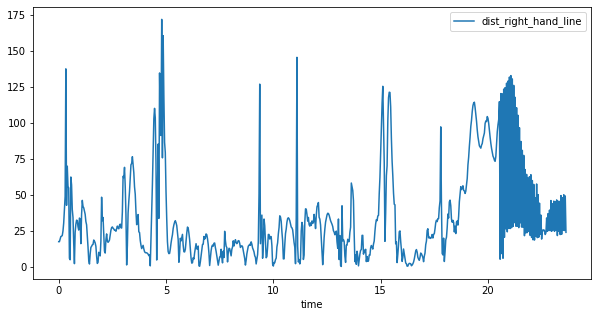

In [53]:
df.plot(x="time", y=["dist_right_hand_line"], figsize=[10,5])

<AxesSubplot:xlabel='time'>

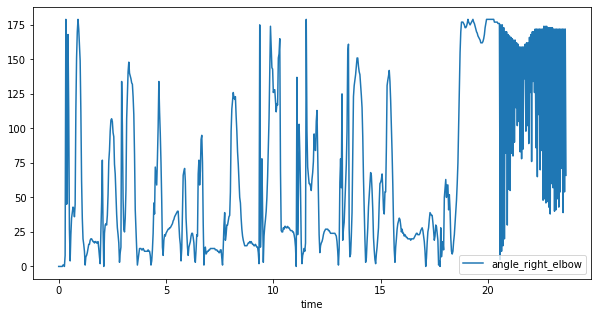

In [54]:
df.plot(x="time", y=["angle_right_elbow"], figsize=[10,5])

### e. Rolling Distances

As we can see above, the data has numerous jumps up and down. We should also reassess the python functions for gathering this, though this is consistent with both the angles and distances.

To fix this, we will use a rolling average

In [55]:
# R is the number of rolling averages
r = 5
df['dist_right_hand_line_rolling'] = df['dist_right_hand_line'].rolling(r).mean()
df['dist_left_hand_line_rolling'] = df['dist_left_hand_line'].rolling(r).mean()
df['angle_right_elbow_rolling'] = df['angle_right_elbow'].rolling(r).mean()
df['angle_left_elbow_rolling'] = df['angle_left_elbow'].rolling(r).mean()

In [56]:
# NOTE: 
# 12 right hand punches
# X left hand punches

<AxesSubplot:xlabel='time'>

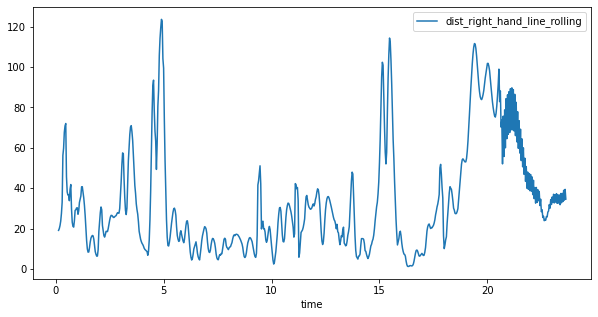

In [57]:
df.plot(x="time", y=["dist_right_hand_line_rolling"], figsize=[10,5])

<AxesSubplot:xlabel='time'>

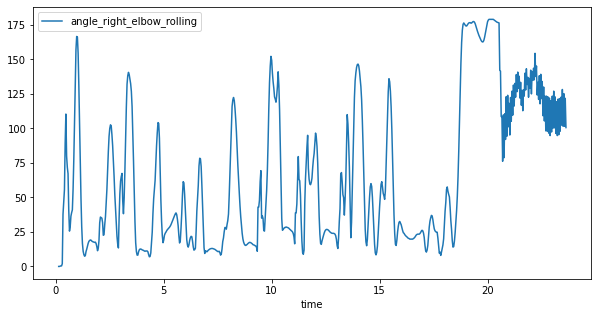

In [58]:
df.plot(x="time", y=["angle_right_elbow_rolling"], figsize=[10,5])

In [59]:
df['angle_right_elbow_rolling']

0        NaN
1        NaN
2        NaN
3        NaN
4        0.0
       ...  
705    101.6
706    125.2
707    101.6
708    121.8
709    100.6
Name: angle_right_elbow_rolling, Length: 710, dtype: float64

#### Gradient

In [60]:
df['gradient_dist_right_hand_line'] = np.gradient(df['dist_right_hand_line'])

In [61]:
df['gradient']

KeyError: 'gradient'

### e. Speed

In [62]:
# Helper function to get the relative speed
def getSpeed(x1, y1, x2, y2, num_frames):
    '''
    Gets the speed of two points based on the number of frames apart they are
    '''
    getDistance(x1, y1, x2, y2)/num_frames

In [63]:
# Calculate speed of a column
def getSpeed(df, num_frames):
    '''
    Calculates the speed of right and left hands
    num_frames refers to the number of frames that speed is calculated within
    '''
    # Right hand speed
    x1 = df['x_right_hand']
    y1 = df['y_right_hand']
    x2 = df['x_right_hand'].shift(num_frames)
    y2 = df['y_right_hand'].shift(num_frames)
    df['speed_right_hand'] = np.sqrt(np.square(y2 - y1) + np.square(x2 - x1)) / num_frames
    
    # Left hand speed
    x1 = df['x_left_hand']
    y1 = df['y_left_hand']
    x2 = df['x_left_hand'].shift(num_frames)
    y2 = df['y_left_hand'].shift(num_frames)
    df['speed_left_hand'] = np.sqrt(np.square(y2 - y1) + np.square(x2 - x1)) / num_frames

In [64]:
# Calculate the speed
getSpeed(df, 3)
df

,angle_right_elbow,angle_left_elbow,angle_right_shoulder,angle_left_shoulder,dist_right_shoulder_hand,dist_left_shoulder_hand,dist_right_hip_hand,dist_left_hip_hand,dist_right_shoulder_hip,dist_left_shoulder_hip,...,left_hand_closer_hip_shoulder,dist_right_hand_line,dist_left_hand_line,dist_right_hand_line_rolling,dist_left_hand_line_rolling,angle_right_elbow_rolling,angle_left_elbow_rolling,gradient_dist_right_hand_line,speed_right_hand,speed_left_hand
0,0,34,105,82,55.693395,93.795490,237.608814,274.835270,290.046152,303.206259,...,shoulder,17.332280,84.149250,NaN,NaN,NaN,NaN,-0.032502,NaN,NaN
1,0,34,105,82,54.286032,93.656978,236.279382,272.835409,287.250825,300.193848,...,shoulder,17.299777,84.410854,NaN,NaN,NaN,NaN,0.875599,NaN,NaN
2,0,34,105,82,53.677318,94.398902,236.624602,270.648913,286.206012,299.708179,...,shoulder,19.083479,84.355510,NaN,NaN,NaN,NaN,1.779336,NaN,NaN
3,0,34,106,82,57.143837,94.692949,232.443452,269.059940,284.918144,299.580742,...,shoulder,20.858450,83.965509,NaN,NaN,NaN,NaN,1.032181,2.210131,2.419060
4,0,34,106,81,57.519918,94.719278,229.092748,266.661551,281.837218,297.996973,...,shoulder,21.147840,83.580389,19.144365,84.092302,0.0,34.0,0.364296,3.066725,2.288589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,39,52,53,127,306.578869,330.131338,199.603204,177.769912,503.556714,470.598869,...,hip,25.174478,91.119973,33.441374,168.726376,101.6,102.8,0.986772,216.545405,348.626920
706,172,175,90,111,581.639648,529.217414,65.449492,291.256627,537.152594,523.172640,...,hip,49.923583,291.716123,38.975570,210.154579,125.2,127.4,-0.056224,213.572876,348.521838
707,54,74,50,132,313.491813,362.559773,213.094602,186.864646,524.108477,493.207255,...,hip,25.062029,113.808696,34.115139,174.745099,101.6,107.0,-0.416068,218.325048,344.068835
708,172,175,90,111,581.798135,528.751496,64.780317,294.378180,537.440227,523.305820,...,hip,49.091447,294.482981,39.440315,216.443268,121.8,130.4,-0.625939,217.023903,349.753782


In [65]:
# Rolling speed
r = 5
df['speed_right_hand_rolling'] = df['speed_right_hand'].rolling(r).mean()
df['speed_left_hand_rolling'] = df['speed_left_hand'].rolling(r).mean()

<AxesSubplot:xlabel='time'>

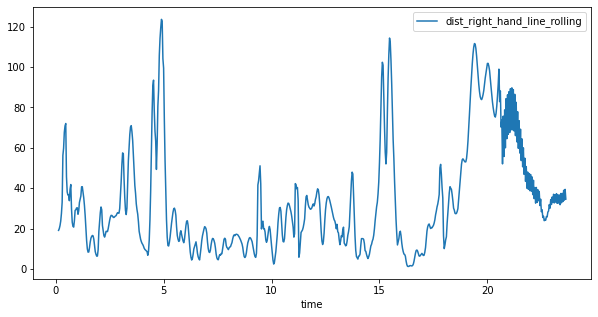

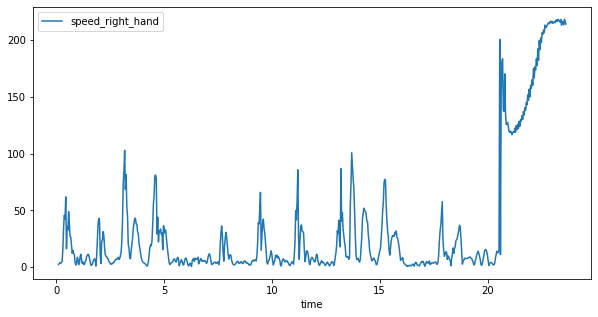

In [66]:
df.plot(x="time", y=["dist_right_hand_line_rolling"], figsize=[10,5])
df.plot(x="time", y=["speed_right_hand"], figsize=[10,5])

#### Normalize speed, distance, and angle

In [67]:
# Right hand
df['norm_dist_right_hand_line'] = df['dist_right_hand_line']/df['dist_right_hand_line'].max()
df['norm_speed_right_hand'] = df['speed_right_hand']/df['speed_right_hand'].max()
df['norm_angle_right_elbow'] = df['angle_right_elbow']/df['angle_right_elbow'].max()
# Left hand
df['norm_dist_left_hand_line'] = df['dist_left_hand_line']/df['dist_left_hand_line'].max()
df['norm_speed_left_hand'] = df['speed_left_hand']/df['speed_left_hand'].max()
df['norm_angle_left_elbow'] = df['angle_left_elbow']/df['angle_left_elbow'].max()

In [68]:
df['right_norm_avg'] = df[['norm_dist_right_hand_line', 'norm_angle_right_elbow']].mean(axis=1)
df['left_norm_avg'] = df[['norm_dist_left_hand_line', 'norm_angle_left_elbow']].mean(axis=1)

<AxesSubplot:xlabel='time'>

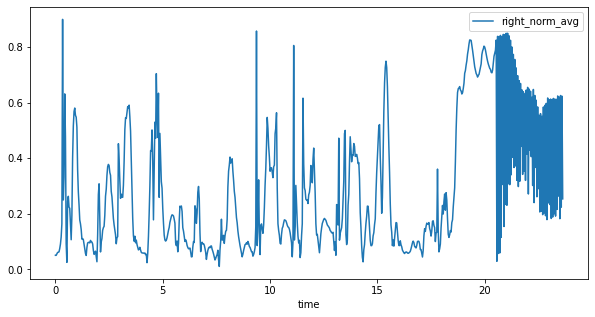

In [69]:
df.plot(x="time", y=["right_norm_avg"], figsize=[10,5])

In [70]:
# Rolling norm average
r = 10
df['right_norm_avg_rolling'] = df['right_norm_avg'].rolling(r).mean()
df['left_norm_avg_rolling'] = df['left_norm_avg'].rolling(r).mean()

<AxesSubplot:xlabel='time'>

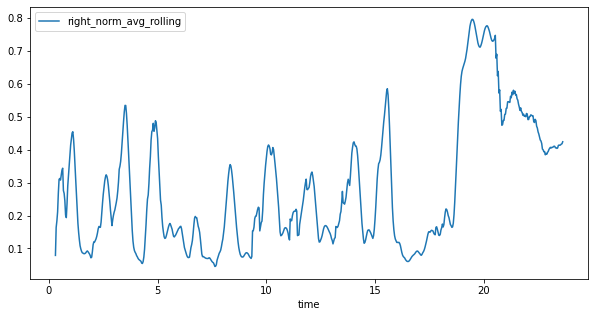

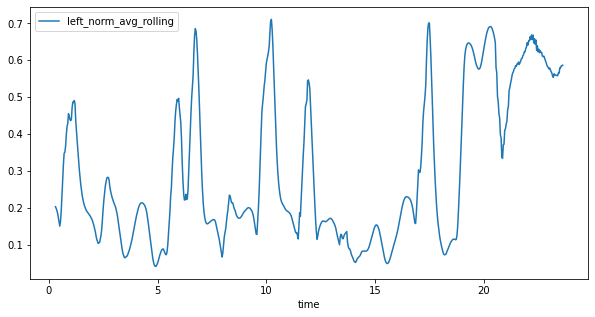

In [71]:
df.plot(x="time", y=["right_norm_avg_rolling"], figsize=[10,5])
df.plot(x="time", y=["left_norm_avg_rolling"], figsize=[10,5])

In [72]:
# Rolling norm angle average
r = 10
df['right_norm_angle_rolling'] = df['norm_angle_right_elbow'].rolling(r).mean()
df['left_norm_angle_rolling'] = df['norm_angle_left_elbow'].rolling(r).mean()

In [73]:
# Rolling norm speed
r = 10
df['right_norm_speed_rolling'] = df['norm_speed_right_hand'].rolling(r).mean()
df['left_norm_speed_rolling'] = df['norm_speed_left_hand'].rolling(r).mean()

In [74]:
# Rolling norm distance
r=10
df['norm_dist_left_hand_line_rolling'] = df['norm_dist_left_hand_line'].rolling(r).mean()

<AxesSubplot:xlabel='time'>

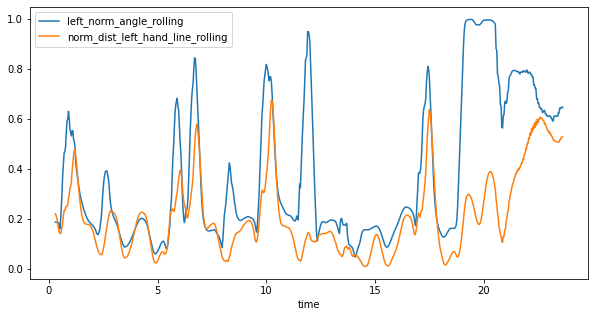

In [75]:
df.plot(x="time", y=["left_norm_angle_rolling", "norm_dist_left_hand_line_rolling"], figsize=[10,5])

In [76]:
df['left_norm_avg'] = df[['left_norm_angle_rolling', 'norm_dist_left_hand_line_rolling']].mean(axis=1)

<AxesSubplot:xlabel='time'>

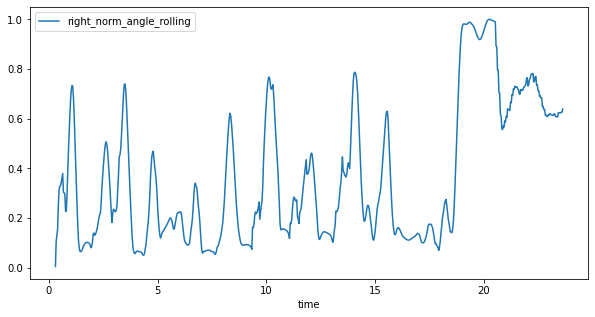

In [78]:
df.plot(x="time", y=["right_norm_angle_rolling"], figsize=[10,5])